<a href="https://colab.research.google.com/github/LucasPequenoSterzeck/Machine_Learning_LPS/blob/main/Logistical_Regressor_Prob_teste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Utilizano o SGDR Regressor

Variante dos metodos de regressão.

<img src='https://programming-review.com/wp-content/uploads/2020/04/scikit-learn.jpg' width='900'>

NOTA: Regressão SGD localizada no quadrante superior da direita.

In [10]:
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import pandas as pd

In [40]:
# Loading data_set
df = pd.read_csv(r'https://raw.githubusercontent.com/LucasPequenoSterzeck/Machine_Learning_LPS/main/EURUSD_2022_d.csv', sep=',', header=1, index_col=False)

i = 0
for R in df.iterrows():
  i += 1
  if i > 1 and R[1].Close > Rp[1].Close: df.loc[R[0], 'DIF'] = 1
  elif i > 1 and R[1].Close < Rp[1].Close: df.loc[R[0], 'DIF'] = -1
  Rp = R
  pass
df.head()

,Date,Open,High,Low,Close,Change(Pips),Change(%),DIF
0,12/30/2022 00:00,1.06599,1.06634,1.06597,1.06608,0.9,0.01,NaN
1,12/29/2022 00:00,1.06067,1.06901,1.06067,1.06615,54.8,0.51,1.0
2,12/28/2022 00:00,1.06387,1.06747,1.06066,1.06125,-26.2,-0.25,-1.0
3,12/27/2022 00:00,1.06351,1.06693,1.06113,1.06386,3.5,0.03,1.0
4,12/23/2022 00:00,1.05917,1.06330,1.05866,1.06205,28.8,0.27,-1.0


In [41]:



df.drop(columns=['Change(%)'], inplace=True)
df['med_5'] = df.Close.rolling(5).mean()
df.fechamento = df.Close.shift(-1)
df.dropna(inplace=True)
print(df.shape)
display(df.head())

df_v = df[-15:]
df = df[:-15]

df.dtypes

(278, 8)


<ipython-input-41-3a434c88f971>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.fechamento = df.Close.shift(-1)


,Date,Open,High,Low,Close,Change(Pips),DIF,med_5
4,12/23/2022 00:00,1.05917,1.06330,1.05866,1.06205,28.8,-1.0,1.063878
5,12/22/2022 00:00,1.06031,1.06592,1.05729,1.05978,-5.3,-1.0,1.062618
6,12/21/2022 00:00,1.06184,1.06457,1.05904,1.06038,-14.6,1.0,1.061464
7,12/20/2022 00:00,1.06038,1.06588,1.05791,1.06244,20.6,1.0,1.061702
8,12/19/2022 00:00,1.05839,1.06576,1.05757,1.06065,22.6,-1.0,1.061060


Date             object
Open            float64
High            float64
Low             float64
Close           float64
Change(Pips)    float64
DIF             float64
med_5           float64
dtype: object

In [42]:
X = df.drop(df[['Date','Close','DIF']], axis=1)
y = df.DIF.values

scaler = MinMaxScaler().fit(X)
features_scale = scaler.transform(X)

xtrain, xtest, ytrain, ytest=train_test_split(features_scale, y, test_size=0.15)

## Testes

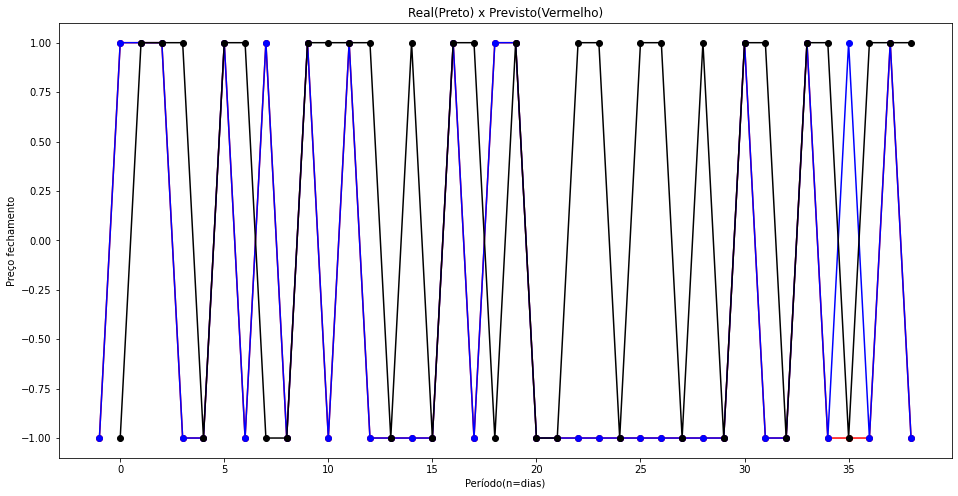

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import warnings
warnings.simplefilter("ignore")

# {'C': 1000, 'fit_intercept': True, 'intercept_scaling': 0.5, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 1}
# 
LR = LogisticRegression(C=10, fit_intercept=True, penalty='l1', solver='saga')
LR2 = LogisticRegression(C=1000, fit_intercept=True, intercept_scaling=0.5, multi_class='auto', penalty='l2', solver='lbfgs', tol=1)

##################

import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

LR.fit(xtrain, ytrain)
pred = LR.predict(xtest)
score = LR.score(xtrain, ytrain)

LR2.fit(xtrain, ytrain)
pred2 = LR2.predict(xtest)
score = LR2.score(xtrain, ytrain)



###################

plt.figure(figsize=(16,8))
plt.title('Real(Preto) x Previsto(Vermelho)')
plt.plot([i for i in range(1-2,len(ytest)+1-2)], pred,  c='red', marker='o')
plt.plot([i for i in range(1-2,len(ytest)+1-2)], pred2,  c='blue', marker='o')
plt.plot([i for i in range(0,len(ytest[:-1]))], ytest[:-1],c='black', marker='o')
plt.xlabel('Período(n=dias)')
plt.ylabel('Preço fechamento')
plt.show()


In [67]:
X_v = df_v.drop(df_v[['Date','Close','DIF']], axis=1)
y_v = df_v.DIF.values

features_scale_v = scaler.transform(X_v)

features_scale_v

array([[0.90099963, 0.89457237, 0.9078615 , 0.44733242, 0.93124771],
       [0.87849468, 0.89528509, 0.89418017, 0.5373461 , 0.92553362],
       [0.92842252, 0.91990132, 0.89407493, 0.17428181, 0.91758657],
       [0.90810926, 0.92631579, 0.91859609, 0.53296854, 0.91810187],
       [0.89014807, 0.89276316, 0.88728689, 0.5255814 , 0.91439172],
       [0.90303095, 0.90625   , 0.90412545, 0.36060192, 0.91119687],
       [0.91650184, 0.9035636 , 0.90738792, 0.36662107, 0.91219311],
       [0.90848346, 0.90614035, 0.91001894, 0.49192886, 0.92121656],
       [0.93521142, 0.91809211, 0.91722795, 0.29165527, 0.91692241],
       [0.89383653, 0.92302632, 0.90901915, 0.63666211, 0.92236167],
       [0.90335169, 0.89221491, 0.89028626, 0.3871409 , 0.92354113],
       [0.91259956, 0.9002193 , 0.91091349, 0.38604651, 0.92351823],
       [0.91286684, 0.91156798, 0.91096611, 0.4500684 , 0.9227052 ],
       [0.92302347, 0.91935307, 0.92612082, 0.37783858, 0.92370145],
       [0.9323248 , 0.92593202, 0.

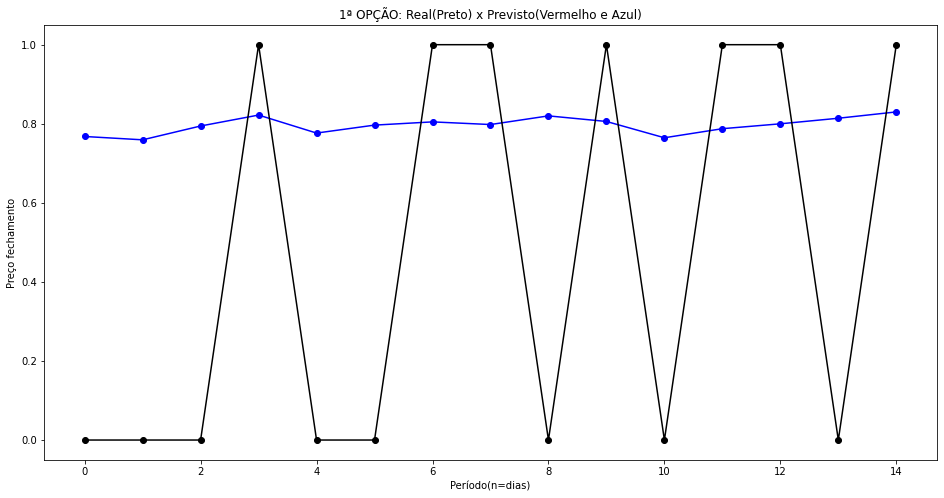

In [38]:
pred = LR.predict(features_scale_v)
pred2 = LR2.predict(features_scale_v)



###################

plt.figure(figsize=(16,8))
plt.title('1ª OPÇÃO: Real(Preto) x Previsto(Vermelho e Azul)')
#plt.plot([i for i in range(1-2,len(y_v)+1-2)], pred,  c='red', marker='o')
plt.plot([i for i in range(0,len(y_v))], pred2,  c='blue', marker='o')
plt.plot([i for i in range(0,len(df_v.DIF.values))], df_v.DIF.values,c='black', marker='o')
plt.xlabel('Período(n=dias)')
plt.ylabel('Preço fechamento')
plt.show()

In [ ]:
pred = LR.predict(features_scale_v)
pred2 = LR2.predict(features_scale_v)

for P1,P2,R,data in zip(pred,pred2,df_v.DIF.values,features_scale_v):
  prob_prev_1 = round(max(np.array(LR.predict_proba(data.reshape(1,-1))[0]))*100)
  prob_prev_2 = round(max(np.array(LR2.predict_proba(data.reshape(1,-1))[0]))*100)
  print(f'Alt.A = {"PUT" if P1 == -1 else "CALL"} em {prob_prev_1}% == {"WIN" if P1 == R else "LOSS"}')
  print(f'Alt.B = {"PUT" if P2 == -1 else "CALL"} em {prob_prev_2}% == {"WIN" if P2 == R else "LOSS"}')
  print(f'Resultado verdadeiro = {"PUT" if R == -1 else "CALL"}\n')


In [ ]:
# Somente para Alt.A

win_ = []
loss_ = []
for P1,P2,R,data in zip(pred,pred2,df_v.DIF.values,features_scale_v):
  prob_prev_1 = round(max(np.array(LR.predict_proba(data.reshape(1,-1))[0]))*100)
  if prob_prev_1 >= 60:
    print(f'Alt.A = {"PUT" if P1 == -1 else "CALL"} em {prob_prev_1}% == {"WIN" if P1 == R else "LOSS"}')
    if P1 == R: win_.append(1)
    else: loss_.append(1)
    print(f'Resultado verdadeiro = {"PUT" if R == -1 else "CALL"}\n')

print(f'''VERSÃO ALT.A
  Quantidade de WIN = {sum(win_)}
  Quantidade de LOSS = {sum(loss_)}

  Tentativas = {sum(win_)+sum(loss_)}
        ''')

In [98]:
# Somente para Alt.B

win_ = []
loss_ = []
for P1,P2,R,data in zip(pred,pred2,df_v.DIF.values,features_scale_v):
  prob_prev_2 = round(max(np.array(LR2.predict_proba(data.reshape(1,-1))[0]))*100)
  if prob_prev_2 >= 60:
    print(f'Alt.A = {"PUT" if P2 == -1 else "CALL"} em {prob_prev_2}% == {"WIN" if P2 == R else "LOSS"}')
    if P1 == R: win_.append(1)
    else: loss_.append(1)
    print(f'Resultado verdadeiro = {"PUT" if R == -1 else "CALL"}\n')

print(f'''VERSÃO ALT.B
  Quantidade de WIN = {sum(win_)}
  Quantidade de LOSS = {sum(loss_)}

  Tentativas = {sum(win_)+sum(loss_)}
        ''')

Alt.A = PUT em 72% == WIN
Resultado verdadeiro = PUT

Alt.A = PUT em 69% == WIN
Resultado verdadeiro = PUT

Alt.A = PUT em 75% == WIN
Resultado verdadeiro = PUT

Alt.A = CALL em 69% == WIN
Resultado verdadeiro = CALL

Alt.A = CALL em 67% == WIN
Resultado verdadeiro = CALL

Alt.A = PUT em 76% == WIN
Resultado verdadeiro = PUT

Alt.A = PUT em 65% == LOSS
Resultado verdadeiro = CALL

Alt.A = CALL em 61% == WIN
Resultado verdadeiro = CALL

VERSÃO ALT.B
  Quantidade de WIN = 7
  Quantidade de LOSS = 1

  Tentativas = 8
        


In [ ]:
for predic,real in zip(X_test,y_test):
  prob_acerto = 70
  prob_0 = round(modelrf['rf'].predict_proba(predic.reshape(1,-1))[0][0]*100)
  prob_1 = round(modelrf['rf'].predict_proba(predic.reshape(1,-1))[0][1]*100)
  prev = modelrf['rf'].predict(predic.reshape(1,-1))
  print(f"Prev. {round(prev[0])} vs. Real {round(real)} == {'WIN' if prev[0]==real else 'LOSS'}")
  if prev[0]==real and prob_0 > prob_acerto or prob_1 > prob_acerto: win_.append(1)
  elif prev[0]!=real and prob_0 > prob_acerto or prob_1 > prob_acerto: loss_.append(1)
  print(f"{prob_0}% 0 || {prob_1}% 1\n")

print(f'''
  Quantidade de WIN = {sum(win_)}
  Quantidade de LOSS = {sum(loss_)}

  Tentativas = {sum(win_)+sum(loss_)}
        ''')

In [ ]:

df_va = pd.DataFrame(zip(df_v.Date.values,df_v.Close.values,pred,pred2,df_v.Open.values), columns=['Data','Fechamento','Previ01','Previ02','Open'])

df_va['Pv01_Real'] = df_va.eval('((Previ01 - Fechamento)-1)*100')
df_va['Pv02_Real'] = df_va.eval('((Previ02 - Fechamento)-1)*100')

co = 0
for r in df_va.iterrows():
  co += 1
  if co > 1:
    if r[1][1] > ant_r[1][1] and r[1][3] > ant_r[1][3]: print('WIN')
    elif r[1][1] < ant_r[1][1] and r[1][3] < ant_r[1][3]: print('WIN')
    else: print('LOSS')


  ant_r = r
df_va

LOSS
WIN
WIN
WIN
WIN
WIN
WIN
WIN
WIN
WIN
WIN
WIN
WIN
WIN


,Data,Fechamento,Previ01,Previ02,Open,Pv01_Real,Pv02_Real
0,12/21/2021 00:00,1.12857,1.187031,1.130029,1.12781,-94.153890,-99.854071
1,12/20/2021 00:00,1.12765,1.201623,1.132579,1.12360,-92.602715,-99.507082
2,12/17/2021 00:00,1.12372,1.135405,1.120030,1.13294,-98.831497,-100.368966
3,12/16/2021 00:00,1.13303,1.207816,1.140653,1.12914,-92.521366,-99.237713
4,12/15/2021 00:00,1.12940,1.199277,1.133345,1.12578,-93.012308,-99.605502
5,12/14/2021 00:00,1.12578,1.169717,1.127709,1.12819,-95.606330,-99.807149
6,12/13/2021 00:00,1.12852,1.172353,1.129341,1.13071,-95.616655,-99.917904
7,12/10/2021 00:00,1.13160,1.197453,1.135502,1.12921,-93.414741,-99.609765
8,12/09/2021 00:00,1.12928,1.161283,1.128711,1.13421,-96.799703,-100.056921
9,12/08/2021 00:00,1.13415,1.226352,1.143956,1.12647,-90.779757,-99.019387
